In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/ML2_Project.zip

Streaming output truncated to the last 5000 lines.
  inflating: ML2_Project/dataset/train/images/N--44-_jpeg.rf.ec5d952d2c9a7c831b30e9a2b363e649.jpg  
  inflating: ML2_Project/dataset/train/images/N--45-_jpeg.rf.a5d0042ddf4388b439ec8bd7956eccfa.jpg  
  inflating: ML2_Project/dataset/train/images/N--46-_jpeg.rf.e8e87f936aecedc6bdd621aeec0dfa65.jpg  
  inflating: ML2_Project/dataset/train/images/N--47-_jpeg.rf.a58766de83b24f26d51348c5e8c182eb.jpg  
  inflating: ML2_Project/dataset/train/images/N--48-_jpeg.rf.5fc5a7c1fb775c383fe5f133b793d28a.jpg  
  inflating: ML2_Project/dataset/train/images/N--49-_jpeg.rf.e52b9d27153fd631ba822dbe00036c99.jpg  
  inflating: ML2_Project/dataset/train/images/N--51-_jpeg.rf.c4564f660e2cb32e7d2f4de959d7a937.jpg  
  inflating: ML2_Project/dataset/train/images/N--52-_jpeg.rf.d7743dcc4fd522fd61b88a7b8d7f2064.jpg  
  inflating: ML2_Project/dataset/train/images/N--56-_jpeg.rf.6ec86d42ad78430e340391175e75cc5a.jpg  
  inflating: ML2_Project/dataset/train/images/N--

In [ ]:
cd ML2_Project

/content/ML2_Project


In [3]:
%pip install -qr requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
import utils
display = utils.notebook_init()

YOLOv5  2022-10-10 Python-3.8.8 torch-1.12.0+cpu CPU


Setup complete  (4 CPUs, 11.8 GB RAM, 97.5/237.9 GB disk)


In [ ]:
%pip install -q wandb

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.9 MB 29.8 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162 kB 74.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 182 kB 71.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 63 kB 2.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162 kB 75.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 158 kB 78.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 157 kB 78.6 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 157 kB 72.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñ

In [ ]:
import wandb; wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
%pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 178 kB 51.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 67 kB 6.8 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 138 kB 64.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 54 kB 3.7 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 145 kB 73.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.1 MB 45.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 62 kB 1.5 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="3I8G3uZWkcEG3EC2GdDs")
project = rf.workspace("sign-language").project("american-language")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to American-Language-1 in yolov5pytorch:: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6810/6810 [00:01<00:00, 3690.91it/s]


In [ ]:
!python train.py --img 640 --batch 32 --epochs 100 --data {dataset.location}/data.yaml --weights ./yolov5s.pt --cache

wandb: Currently logged in as: anaghaashok6. Use `wandb login --relogin` to force relogin
train: weights=./yolov5s.pt, cfg=, data=/content/ML2_Project/American-Language-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 537, done.
remote: Counting objects: 100% (405/405), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 537 (delta 380), reused 378 (delta 362), pack-reused 132
Receiving objects: 100% (537/537), 108.20 KiB | 21.64 MiB/s, done.
Resolvi

In [2]:
!python detect.py --weights "best.pt" --img 640 --conf 0.25 --source "dataset/valid/images"

detect: weights=['best.pt'], source=dataset/valid/images, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'C:\Users\HP\Desktop\sjc\SEM': No such file or directory
YOLOv5  2022-10-10 Python-3.8.8 torch-1.12.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7080247 parameters, 0 gradients, 16.0 GFLOPs
image 1/680 C:\Users\HP\Desktop\sjc\SEM 3\ML 2 lab\ML2_Project\dataset\valid\images\A--1-_jpeg.rf.aeee54037776ffd9c9e49ab72d12046f.jpg: 640x640 1 M, 384.3ms
image 2/680 C:\Users\HP\Desktop\sjc\SEM 3\ML 2 lab\ML2_Project\dataset\valid\images\A--16-_jpeg.rf.c81613ca4d0159b649604a511af79b50.jpg: 640x640 1 A, 394.0ms
image 3

In [4]:
import os
import random
#from Ipython.display import Image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

runs\detect\exp3\U16_jpg.rf.d11f61df3c338e4c7580930d208b6a1c.jpg


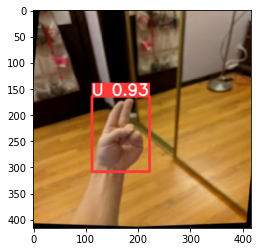

In [10]:
detections_dir="runs\detect\exp3"
detection_images=[os.path.join(detections_dir,x) for x in os.listdir(detections_dir)]
random_detection_image=Image.open(random.choice(detection_images))
print(random_detection_image.filename)
plt.imshow(np.array(random_detection_image))

In [11]:
!python detect.py --weights "best.pt" --img 640 --conf 0.25 --source 0

detect: weights=['best.pt'], source=0, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'C:\Users\HP\Desktop\sjc\SEM': No such file or directory
YOLOv5  2022-10-10 Python-3.8.8 torch-1.12.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7080247 parameters, 0 gradients, 16.0 GFLOPs
1/1: 0...  Success (inf frames 640x480 at 30.00 FPS)

0: 480x640 (no detections), 398.1ms
0: 480x640 1 W, 362.8ms
0: 480x640 (no detections), 264.7ms
0: 480x640 (no detections), 381.6ms
0: 480x640 (no detections), 309.5ms
0: 480x640 (no detections), 339.7ms
0: 480x640 (no detections), 350.6ms
0: 480x640 (no detections), 325.4ms
0: 480x640 